### 📍 Example 6: P-Center Optimization Problem

The **P-Center problem** is a classic facility location problem where the objective is to **minimize the maximum distance** any demand point must travel to reach an open facility. This is useful in applications where service quality is measured by the **worst-case response time**, such as emergency facilities.

🧠 **Objective:**
Minimize the maximum distance `z` between any demand point and the facility it's assigned to.

🧩 **Mathematical Formulation:**

Minimize:

\[
z
\]

Subject to:

- Each demand point is assigned to **exactly one** facility  
- Demand can only be assigned to **opened** facilities  
- Only `p` facilities are allowed to be opened  
- Distance between any assigned demand-facility pair is ≤ `z`

📦 **Data Used:**
- 4 demand points: D1, D2, D3, D4  
- 3 facility candidates: F1, F2, F3  
- Distance matrix `d[i,j]`  
- Number of facilities to open `p = 2`

📐 **Goal:** Assign demand points to open facilities such that the **maximum** distance is minimized.


In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Define the data
I = ['D1', 'D2', 'D3', 'D4']
J = ['F1', 'F2', 'F3']
d = {
    ('D1', 'F1'): 2, ('D1', 'F2'): 4, ('D1', 'F3'): 5,
    ('D2', 'F1'): 3, ('D2', 'F2'): 2, ('D2', 'F3'): 6,
    ('D3', 'F1'): 4, ('D3', 'F2'): 3, ('D3', 'F3'): 2,
    ('D4', 'F1'): 5, ('D4', 'F2'): 6, ('D4', 'F3'): 3
}
p = 2

# Create a new model
model = gp.Model("p-center")

# Create variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")
y = model.addVars(I, J, vtype=GRB.BINARY, name="y")
z = model.addVar(vtype=GRB.CONTINUOUS, name="z")

# Set objective
model.setObjective(z, GRB.MINIMIZE)

# Add constraints
model.addConstrs((gp.quicksum(y[i, j] for j in J) == 1 for i in I), name="Assign")
model.addConstrs((y[i, j] <= x[j] for i in I for j in J), name="Open")
model.addConstr(gp.quicksum(x[j] for j in J) == p, name="FacilityCount")
model.addConstrs((d[i, j] * y[i, j] <= z for i in I for j in J), name="MaxDistance")

# Optimize model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    for j in J:
        if x[j].x > 0.5:
            print(f"Facility located at {j}")
    for i in I:
        for j in J:
            if y[i, j].x > 0.5:
                print(f"Demand point {i} is assigned to facility {j}")
    print(f"Maximum distance: {z.x}")
else:
    print("No optimal solution found")

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 29 rows, 16 columns and 63 nonzeros
Model fingerprint: 0x10c2414d
Variable types: 1 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 6.0000000
Presolve removed 29 rows and 16 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 2: 3 6 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Optimal solution found:
Facility located at F1
Fa

### 🗺️ Visualization of P-Center Solution
This mini visualization provides a **graphical view** of the optimal assignment of demand points to open facilities.

#### 🔎 What You See:
- **Blue nodes** on the left: Represent demand points (D1, D2, D3, D4)
- **Red nodes** on the right: Represent the **opened** facility locations  
- **Gray nodes**: Facility candidates **not selected**
- **Edges**: Represent which demand point is assigned to which facility

#### 🎯 Key Insights:
- Each demand point is connected to **exactly one** facility
- Only **p = 2** facilities are opened, based on the optimization result
- The goal is to minimize the **maximum distance** (worst-case assignment)

This helps verify the logic and outcome of the model visually — even in small examples.


/tmp/ipython-input-2116539359.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


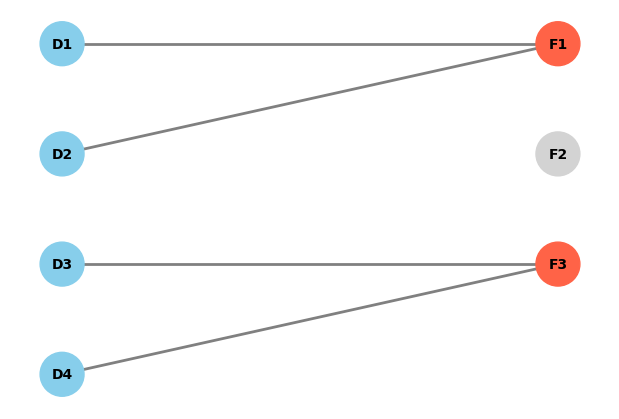

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Layout config
node_colors = []
node_pos = {}
y_gap = 1.2

# Demand nodes on left
for idx, i in enumerate(I):
    G.add_node(i)
    node_colors.append('skyblue')
    node_pos[i] = (0, -idx * y_gap)

# Facility nodes on right
for idx, j in enumerate(J):
    G.add_node(j)
    color = 'tomato' if x[j].x > 0.5 else 'lightgray'
    node_colors.append(color)
    node_pos[j] = (2.5, -idx * y_gap)

# Add edges for assignments
for i in I:
    for j in J:
        if y[i, j].x > 0.5:
            G.add_edge(i, j)

# Plot
plt.figure(figsize=(6, 4))
nx.draw(G, pos=node_pos, with_labels=True,
        node_color=node_colors, node_size=1000,
        arrows=False, edge_color='gray', width=2,
        font_size=10, font_weight='bold')

plt.axis('off')
plt.tight_layout()
plt.show()
